In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import linecache
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
k1_result = pd.read_csv("/home/htran197/k1_results.csv")
k2_result = pd.read_csv("/home/htran197/k2_results.csv")
print("Kernel 1 Results")
print(k1_result)
print('////////////////////////////////////////////////////////////////////')
print("Kernel 2 Results")
print(k2_result)

Kernel 1 Results
               Benchmark      Real     SASS      PTX
0               backprop  56.70192  77.7557  83.8674
1        binomialOptions  44.95794  74.1722  72.7933
2                 b+tree  44.29484  74.1722  72.7933
3                 dct8x8  42.46558  74.1722  72.7933
4     fastWalshTransform  41.55978  89.8069  90.6211
5              histogram  55.74590  82.8825  75.8586
6                hotspot  42.15578  82.8825      NaN
7                 kmeans  45.90302  71.5768  83.8674
8              mergeSort  54.79382  87.2023  83.1467
9          parboil-mri-q  57.36638  36.9638  37.0237
10           parboil-sad  44.78802  89.8069  90.6211
11         parboil-sgemm  65.41236  85.7725  83.1467
12            pathfinder  53.63542  77.4958      NaN
13  quasirandomGenerator  63.43850  89.8069  83.5167
14             sobolQRNG  54.29438  87.2023  83.1467
15               srad_v1  57.86464  85.7725  74.6558
////////////////////////////////////////////////////////////////////
Kernel 2 Resu

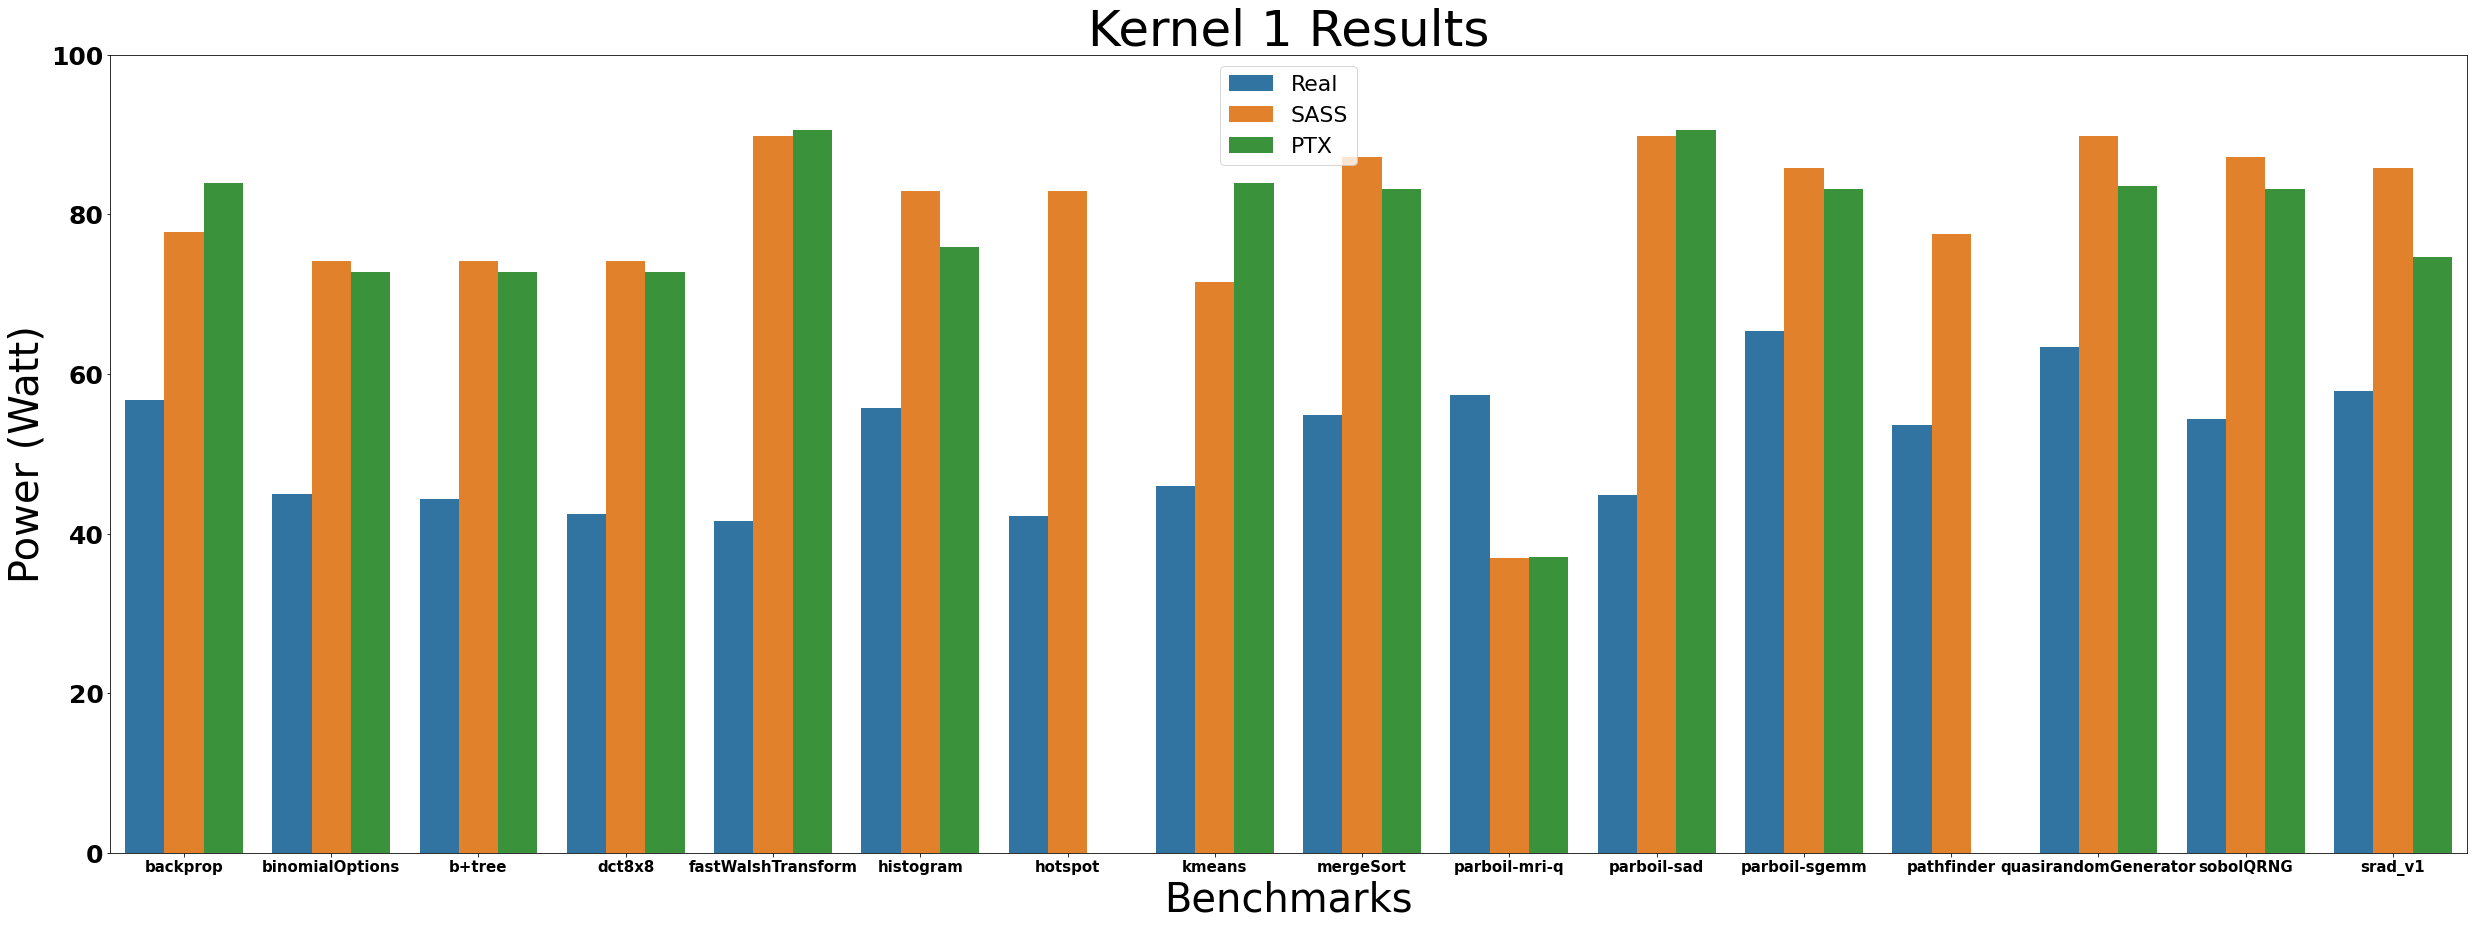

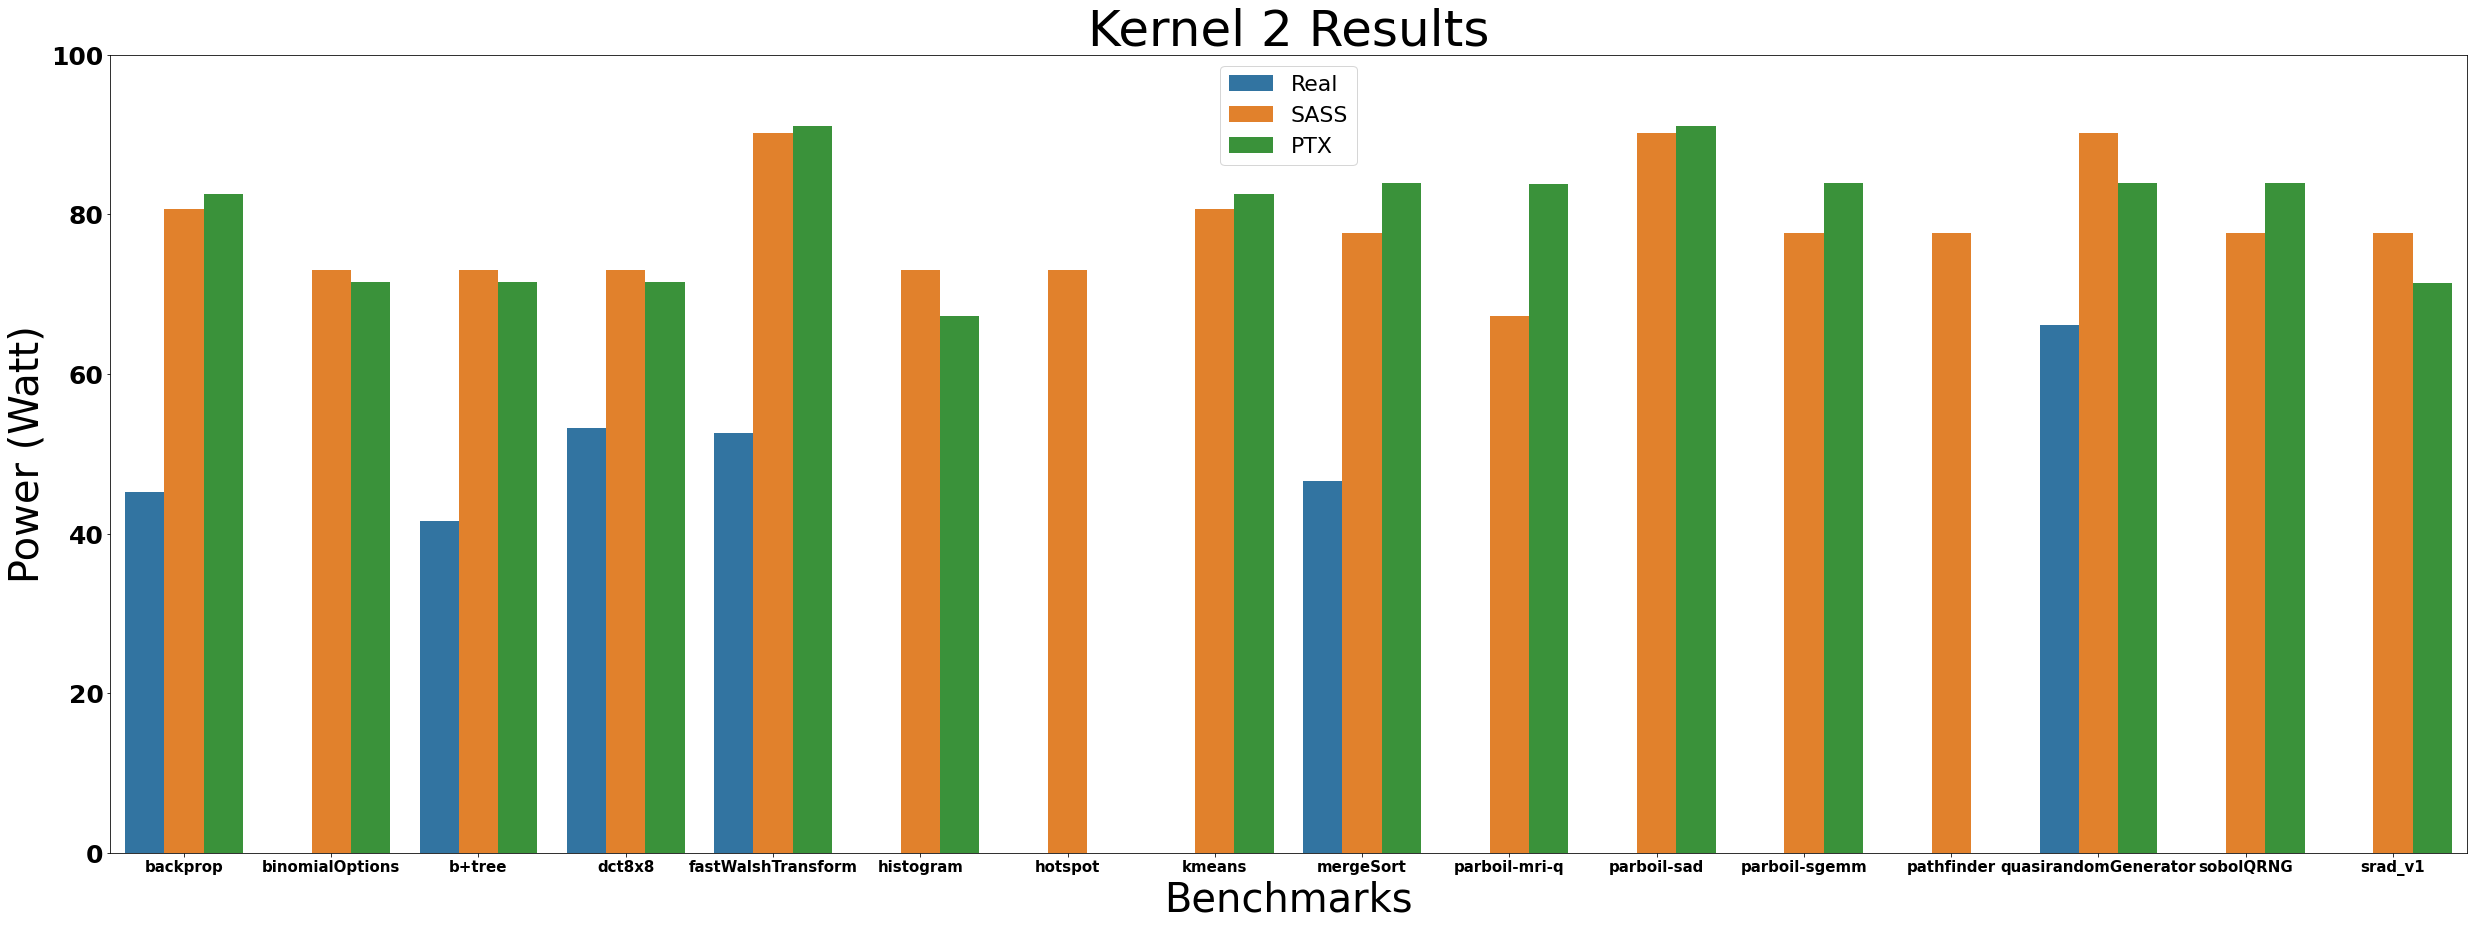

In [49]:
k1Data = k1_result.melt('Benchmark', var_name='type', value_name='power')
fig1 = plt.subplots(figsize=(35, 14))
sns.barplot(data=k1Data, x="Benchmark", y="power", hue="type")
plt.title('Kernel 1 Results',fontsize=50)
plt.xlabel('Benchmarks', fontsize=40)
plt.ylabel('Power (Watt)', fontsize=40)
plt.legend(fontsize=22, loc='upper center')
plt.tight_layout(pad=5, w_pad=5, h_pad=5)
plt.ylim(0, 100)
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.savefig('k1_power.png', facecolor='w')


k2Data = k2_result.melt('Benchmark', var_name='type', value_name='power')
fig2 = plt.subplots(figsize=(35, 14))
sns.barplot(data=k2Data, x="Benchmark", y="power", hue="type")
plt.title('Kernel 2 Results',fontsize=50)
plt.xlabel('Benchmarks', fontsize=40)
plt.ylabel('Power (Watt)', fontsize=40)
plt.legend(fontsize=22, loc='upper center')
plt.tight_layout(pad=5, w_pad=5, h_pad=5)
plt.ylim(0, 100)
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.savefig('k2_power.png', facecolor='w')

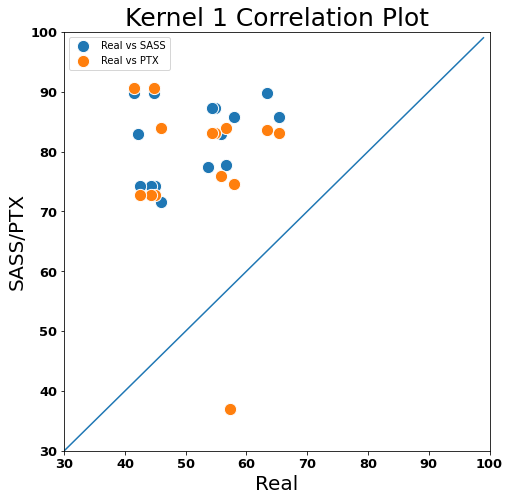

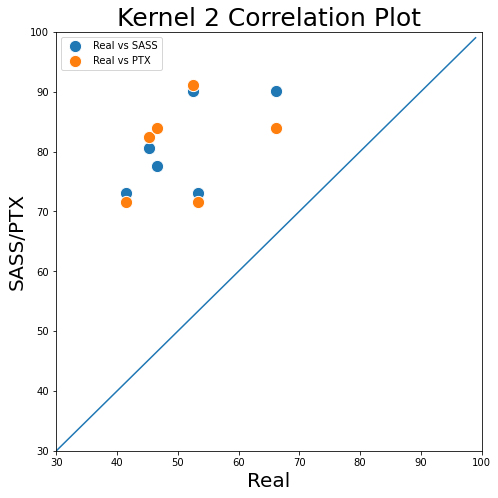

In [53]:
x = list(range(0,100,1))
y = [i for i in x]
my_data = pd.DataFrame({'x':x, 'y':y})

fig3 = plt.subplots(figsize=(7, 7))
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.title("Kernel 1 Correlation Plot",fontsize=25)
plt.xlabel('Real', fontsize=20)
plt.ylabel('SASS/PTX', fontsize=20)
sns.scatterplot(data=k1_result, x="Real", y="SASS", label="Real vs SASS", s=150)
sns.scatterplot(data=k1_result, x="Real", y="PTX", label="Real vs PTX", s=150)
sns.lineplot(x='x',y='y', data=my_data)
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.savefig('k1_scatter.png', facecolor='w')


fig4 = plt.subplots(figsize=(7, 7))
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.title("Kernel 2 Correlation Plot",fontsize=25)
plt.xlabel('Real', fontsize=20)
plt.ylabel('SASS/PTX', fontsize=20)
sns.scatterplot(data=k2_result, x="Real", y="SASS", label="Real vs SASS", s=150)
sns.scatterplot(data=k2_result, x="Real", y="PTX", label="Real vs PTX", s=150)
sns.lineplot(x='x',y='y', data=my_data)
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.savefig('k2_scatter.png', facecolor='w')


In [16]:
import math

#Calculating mean absolute percentage error (MAPE)
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [17]:
sassMAPEk1 = []
ptxMAPEk1 = []
for i, row in scatDFk1.iterrows():
    if math.isnan(scatDFk1['hwPower'][i]) != True and math.isnan(scatDFk1['sassPower'][i]) != True:
        sassMAPEk1.append(mape(scatDFk1['hwPower'][i],scatDFk1['sassPower'][i]))

for i, row in scatDFk1.iterrows():
    if math.isnan(scatDFk1['hwPower'][i]) != True and math.isnan(scatDFk1['ptxPower'][i]) != True:
        ptxMAPEk1.append(mape(scatDFk1['hwPower'][i],scatDFk1['ptxPower'][i]))
        
print("sassMAPE k1:", np.average(sassMAPEk1))
print("ptxMAPE k1:", np.average(ptxMAPEk1))

sassMAPEk2 = []
ptxMAPEk2 = []
for i, row in scatDFk2.iterrows():
    if math.isnan(scatDFk2['hwPower'][i]) != True and scatDFk2['hwPower'][i] > 0.0 and math.isnan(scatDFk2['sassPower'][i]) != True:
        sassMAPEk2.append(mape(scatDFk2['hwPower'][i],scatDFk2['sassPower'][i]))

for i, row in scatDFk2.iterrows():
    if math.isnan(scatDFk2['hwPower'][i]) != True and scatDFk2['hwPower'][i] > 0.0 and math.isnan(scatDFk2['ptxPower'][i]) != True:
        ptxMAPEk2.append(mape(scatDFk2['hwPower'][i],scatDFk2['ptxPower'][i]))
        
print("sassMAPE k2:", np.average(sassMAPEk2))
print("ptxMAPE k2:", np.average(ptxMAPEk2))

NameError: name 'scatDFk1' is not defined